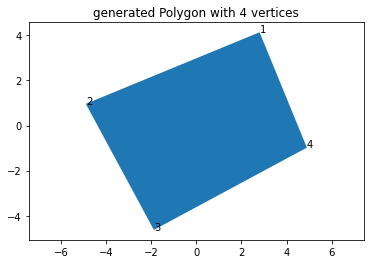

new_poly area: 47.574515404525876
normal 4-agon area: 1.2677350503426308
edge_lengths: [6.899432020271076, 6.8994320202710755, 6.899432020271076, 6.899432020271077]


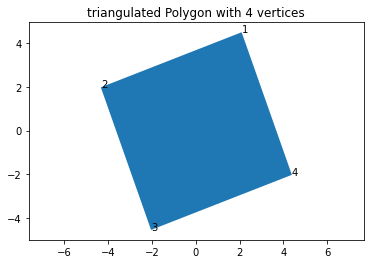

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely import geometry

# check if a point is above a line
is_above = lambda p,a,b: np.cross(p-a, b-a) < 0

def generate_random_polygon(n, radius=5):
	"""Generates a random polygon with n vertices."""

	# Generate random angles
	angles = np.random.rand(n) * 2 * np.pi 

	# Convert angles to x, y coordinates
	x = radius * np.cos(angles)
	y = radius * np.sin(angles)

	# Sort vertices by angle to ensure a non-self-intersecting polygon
	vertices = np.stack((x, y), axis=1)
	vertices = vertices[np.argsort(angles)]
	return vertices


# Create figure and axes
def sketch_polygon(vertices, special_name=None):
	# for quadrilaterals only
	
	fig, ax = plt.subplots()
	# Define polygon parameters
	# Create the polygon patch
	polygon_sketch = Polygon(vertices)
	for i in range(len(vertices)):
		plt.annotate(i+1,vertices[i])
	# Add polygon to the plot
	ax.add_patch(polygon_sketch)

	plt.axis('equal')  # Ensure axes are scaled equally
	plt.title(f"{special_name} Polygon with {len(vertices)} vertices")
	plt.show()

# returns a new set of vertices representing the isosceles form of triangle with the same base
def make_isosceles(triangle):

	p1 = triangle[0]
	p2 = triangle[1]
	p3 = triangle[2]

	# Step 1: Compute the midpoint, height h, and line (s,y_0) that is perpendicular to the base
	midpoint = (p1 + p3) / 2

	perp_slope = -(p3[0]-p1[0])/(p3[1]-p1[1])
	height = np.abs(np.cross(p2-p3,p2-p1)/np.linalg.norm(p3-p1))

	# Step 2: Construct a vector height_vect with norm h, with slope s.
	height_vect_x = np.sqrt((height**2)/(1+(perp_slope**2)))
	height_vect_y = perp_slope*height_vect_x
	height_vect = [height_vect_x,height_vect_y]

	# Step 3: If original vertex was above the midpoint return new vertex pt = old v + height_vect, else return minus
	above_line = is_above(p2,p3,p1)
	if(p3[1]>p1[1]):
		if(above_line):
			triangle[1] = midpoint+height_vect 
		else:
			triangle[1] = midpoint-height_vect 
	else:
		if(above_line):
			triangle[1] = midpoint-height_vect 
		else:
			triangle[1] = midpoint+height_vect 

	return triangle

# iterates exactly n times for the first vertex
def triangulation(vertices):
	n = len(vertices)
	for i in range(n):
		# constructing the new isoscles
		triangle = [vertices[i], vertices[(i + 1) % n], vertices[(i + 2) % n]] 
		isosceles_triangle = make_isosceles(triangle)

		# replacing the old triangle with the new isosceles
		vertices[i] = list(isosceles_triangle[0])
		vertices[(i+1)%n] = list(isosceles_triangle[1])
		vertices[(i+2)%n] = list(isosceles_triangle[2])
	return vertices 

# need to double check of the normal n-agon area func is accurate
def perimeter(vertices):
	perimeter = 0
	for j in range(len(vertices)):
		perimeter += np.linalg.norm(vertices[(j+1)%len(vertices)]-vertices[j])
	return perimeter

def normal_poly_area(n,perimeter):
	return (np.power(perimeter,2))/(4*n*np.tan(np.pi/n))



def PolyArea(vertices):
    n = len(vertices)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += vertices[i][0] * vertices[j][1]
        area -= vertices[j][0] * vertices[i][1]
    area = abs(area) / 2.0
    return area


# measures the convergence rate for the first vertex
def measure_convergence(vertices, cycles):
	distances = [np.linalg.norm(vertices[0]-vertices[1])]
	perim = perimeter(vertices)
	n = len(vertices)
	for i in range(cycles):
		new_vertices = triangulation(vertices)
		distances.append(np.linalg.norm(new_vertices[0]-new_vertices[1]))
		vertices = new_vertices

	'''# plotting the length of the first edge after #cycles
	plt.plot(distances)
	#plt.axhline(y = perim/(len(vertices)), linestyle='--', color='red',label="Regular poly. side length")
	plt.title(f"Length of the first edge across {n} cycles")
	plt.xlabel("n cycles")
	plt.xticks(np.arange(0,cycles+1,1))
	plt.ylabel("Length")
	plt.legend()'''
	return vertices

# find the lengths of each edge
def edge_lengths(vertices):
	lengths = []
	for i in range(len(vertices)):
		lengths.append(np.abs(np.linalg.norm(vertices[(i+1)%len(vertices)]-vertices[i])))
	return lengths

## Example usage\

# number of vertices
n = 4
# we need a fix to send nonconvex polygons to convex by reflection
# generate n random vertices (convex polygon)
vertices = generate_random_polygon(n)
sketch_polygon(vertices, "generated")

# apply the triangulation cycle 30 times (each triangulation cycle makes 
# every triangle formed by three consecutive edges isosceles once in CCW)

new_poly = measure_convergence(vertices,30)
print("new_poly area:",PolyArea(new_poly))
print(f"normal {n}-agon area:",normal_poly_area(perimeter(new_poly),n))
print("edge_lengths:",edge_lengths(new_poly))
sketch_polygon(new_poly, "triangulated")



vertices: [[ 2.56342465 -0.24180166]
 [ 5.22687551  0.75146841]
 [ 0.72616785  3.78204819]
 [ 0.02038101  1.0284286 ]]
inter_trap: [[ 3.81253411 -1.34896703]
 [ 5.22687551  0.75146841]
 [ 0.72616785  3.78204819]
 [-0.68817355  1.68161275]]
trapezoid: [[ 2.74113397 -0.62753302]
 [ 5.22687551  0.75146841]
 [ 0.72616785  3.78204819]
 [ 0.38322659  0.96017874]]
p1: [ 2.74113397 -0.62753302]
p2: [5.22687551 0.75146841]
p3: [0.72616785 3.78204819]
p4: [0.38322659 0.96017874]


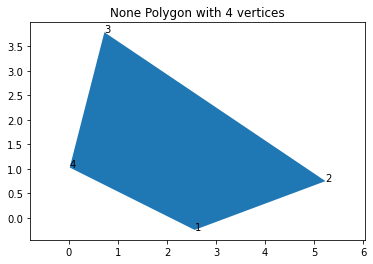

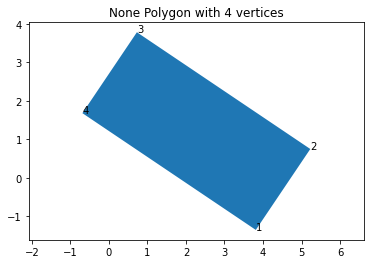

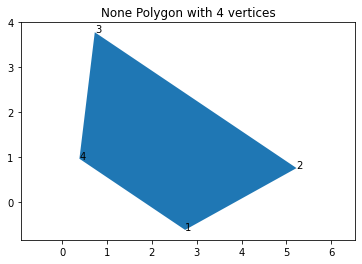

old perim: 13.953831746307387
new perim: 13.953831746307388


In [89]:
# fix vertices 2,3 adjust 1,4
# NEED TO DO SOME CASE SWITCHING WHEN 1-4 IS SMALLER THAN 2-3
# check if a point is above a line
def is_above_line(p,p1,p2):
	slope = (p2[1]-p1[1])/(p2[0]-p1[0])
	intercept = p1[1]-(slope*p1[0])
	theoretical_y = intercept+(slope*p[0])
	if(p[1]>=theoretical_y):
		return True
	else:
		return False
     
def quadToTrapezoid(vertices):

    p1 = vertices[0]
    p2 = vertices[1]
    p3 = vertices[2]
    p4 = vertices[3]

    right = np.abs(np.linalg.norm(p1-p2))
    left = np.abs(np.linalg.norm(p3-p4))
    l_bar = (right+left)/2
    #print("l_bar:",l_bar)
    top_base = np.abs(np.linalg.norm(p2-p3))
    bot_base = np.abs(np.linalg.norm(p1-p4))
    #print("top_base:",top_base)
    #print("bot_base:",bot_base)
    x_offset = (bot_base-top_base)/2
    h = np.sqrt(np.power(l_bar,2)-np.power(x_offset,2))
    h_squared = np.power(l_bar,2)-np.power(x_offset,2)

    # case switch when 1-4 is smaller than 2-3
    if(top_base<=bot_base):
        #print("case1")
        slope = (p3[1]-p2[1])/(p3[0]-p2[0])
        #print("slope:",slope)
        perp_slope = -1/slope
        x = np.sqrt(h_squared/(1+np.power(perp_slope,2)))
        y = perp_slope*x

        x2 = np.sqrt(np.power(x_offset,2)/(1+np.power(slope,2)))
        y2 = slope*x2
        '''print("x:",x)
        print("y:",y)
        print("x2:",x2)
        print("y2:",y2)
        print("p2:",p2)
        print("p3:",p3)'''

        if(is_above_line(p1,p2,p3)):
            new_p1 = [p2[0]+x, p2[1]+y]
            new_p4 = [p3[0]+x, p3[1]+y]
            #print(3)
        else:
            new_p1 = [p2[0]-x, p2[1]-y]
            new_p4 = [p3[0]-x, p3[1]-y]
            #print(4)

        intermediate_trap = np.array([new_p1,p2,p3,new_p4])

        if(is_above_line(new_p1,p2,p3)):
            final_p1 = [new_p1[0]-x2, new_p1[1]-y2]
            final_p4 = [new_p4[0]+x2, new_p4[1]+y2]
            #print(1)
        else:
            final_p1 = [new_p1[0]+x2, new_p1[1]+y2]
            final_p4 = [new_p4[0]-x2, new_p4[1]-y2]
            #print(2)

        '''print("measured_h:",np.abs(np.linalg.norm(new_p1-p2)))
        print("should_be_h:",np.sqrt(np.power(l_bar,2)-(np.power(x_offset,2))))
        print("new left:",np.abs(np.linalg.norm(new_p1-p2)))
        print("new right:",np.abs(np.linalg.norm(new_p4-p3)))'''
    
    else:
        #print("case2")
        #print("case1")
        slope = (p3[1]-p2[1])/(p3[0]-p2[0])
        #print("slope:",slope)
        perp_slope = -1/slope
        x = np.sqrt(h_squared/(1+np.power(perp_slope,2)))
        y = perp_slope*x

        x2 = np.sqrt(np.power(x_offset,2)/(1+np.power(slope,2)))
        y2 = slope*x2
        '''print("x:",x)
        print("y:",y)
        print("x2:",x2)
        print("y2:",y2)
        print("p2:",p2)
        print("p3:",p3)'''

        if(slope>0):
            if(is_above_line(p1,p2,p3)):
                new_p1 = [p2[0]-x, p2[1]-y]
                new_p4 = [p3[0]-x, p3[1]-y]
                #print(3)
            else:
                new_p1 = [p2[0]+x, p2[1]+y]
                new_p4 = [p3[0]+x, p3[1]+y]
                #print(4)
        else:
            if(is_above_line(p1,p2,p3)):
                new_p1 = [p2[0]+x, p2[1]+y]
                new_p4 = [p3[0]+x, p3[1]+y]
                #print(3)
            else:
                new_p1 = [p2[0]-x, p2[1]-y]
                new_p4 = [p3[0]-x, p3[1]-y]
                #print(4)
        intermediate_trap = np.array([new_p1,p2,p3,new_p4])

        if(is_above_line(new_p1,p2,p3)):
            final_p1 = [new_p1[0]+x2, new_p1[1]+y2]
            final_p4 = [new_p4[0]-x2, new_p4[1]-y2]
            #print(1)
        else:
            final_p1 = [new_p1[0]-x2, new_p1[1]-y2]
            final_p4 = [new_p4[0]+x2, new_p4[1]+y2]
            #print(2)

        '''print("measured_h:",np.abs(np.linalg.norm(new_p1-p2)))
        print("should_be_h:",np.sqrt(np.power(l_bar,2)-(np.power(x_offset,2))))
        print("new left:",np.abs(np.linalg.norm(new_p1-p2)))
        print("new right:",np.abs(np.linalg.norm(new_p4-p3)))'''

    return intermediate_trap, np.array([final_p1,p2,p3,final_p4])
     
n = 4
vertices = np.array([[2.56342465, -0.24180166], [5.22687551, 0.75146841], [0.72616785, 3.78204819], [0.02038101, 1.0284286 ]])

'''                                                
inter_trap, trapezoid = quadToTrapezoid(vertices)
print("vertices:",vertices)
print("inter_trap:",inter_trap)
print("trapezoid:",trapezoid)
print("p1:",trapezoid[0])
print("p2:",trapezoid[1])
print("p3:",trapezoid[2])
print("p4:",trapezoid[3])
sketch_polygon(vertices)
sketch_polygon(inter_trap)
sketch_polygon(trapezoid)
print("old perim:",perimeter(vertices))
print("new perim:",perimeter(trapezoid))
'''


In [21]:
# function that splits a polygon into triangles/quadrilaterals
import math
def sort_vertices(points):
   def key(x):
      atan = math.atan2(x[1], x[0])
      return (atan, x[1]**2+x[0]**2) if atan >= 0 else (2*math.pi + atan, x[0]**2+x[1]**2)

   return sorted(points, key=key)

def split_poly(vertices,start_vertex):
    n = len(vertices)
    polyies = []
    j = n
    # finding the indices of the polygon vertices
    while(j>=1):
        if(j==n):
            polyies.append([start_vertex,(start_vertex+1)%n,(start_vertex+2)%n])
            j -= 3
        else:
            start_node = polyies[-1][0]
            end_node = polyies[-1][-1]
            # case of the last triangle
            if((start_node-1)%n == (end_node+1)%n):
                new_poly = [start_node,end_node,(end_node+1)%n]
            else:
                new_poly = [(start_node-1)%n,start_node,end_node,(end_node+1)%n]
                
            polyies.append(new_poly)
            # subtracting only the added vertices
            j -= len(new_poly)-2

    # converting these indices into cartesian coordinates
    poly_coordinates = []
    for i in range(len(polyies)):
        current_poly = []
        for y in range(len(polyies[i])):
            current_poly.append(vertices[polyies[i][y]])
        poly_coordinates.append(current_poly)
    return poly_coordinates, polyies

'''# test
n = 5
vertices = generate_random_polygon(n)
print("vertices:",vertices)
sketch_polygon(vertices)

poly_coord, poly_indices = split_poly(vertices,0)
print(poly_indices)
print("poly_coord:",poly_coord)

for i in range(len(poly_indices)):
    sketch_polygon(poly_coord[i])'''

'# test\nn = 5\nvertices = generate_random_polygon(n)\nprint("vertices:",vertices)\nsketch_polygon(vertices)\n\npoly_coord, poly_indices = split_poly(vertices,0)\nprint(poly_indices)\nprint("poly_coord:",poly_coord)\n\nfor i in range(len(poly_indices)):\n    sketch_polygon(poly_coord[i])'

----------Starting Poly------------
start_poly: [[-3.10814532 -3.91655878]
 [ 0.27916516 -4.9922006 ]
 [ 2.18730389 -4.49618746]
 [ 3.80070927 -3.24878578]
 [ 4.77789538 -1.47367422]]
start_poly_perimeter: 17.846982394755535
start_poly_area: 11.442400889314595
start_poly_iso: 27.836359141738935


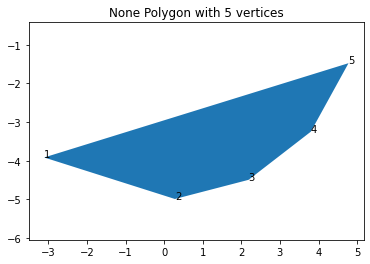

----------Trap_Tri Fitting Without Triangulation------------
ttFittedWithoutTriang: [array([-0.30368872,  0.83215142]), array([-3.00707432, -1.3233056 ]), array([-1.79251682, -4.56044625]), array([ 1.66151945, -4.40566067]), array([ 2.58165837, -1.07285796])]
ttFittedWithoutTriang_perimeter: 17.2874754330976
ttFittedWithoutTriang_area: 20.567055287848365
ttFittedWithoutTriang_iso: 14.53085056014444
ttFittedWithoutTriang_convergedIter: 11


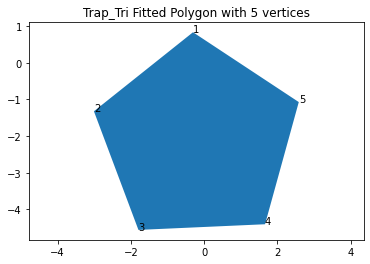

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------Trap_tri Fitting Poly with Triangulation------------
ttFittedWithTriang: [array([2.57780299, 0.39800539]), array([-1.61854363, -1.54571801]), array([-1.06668247, -6.137318  ]), array([ 3.47072973, -7.03135581]), array([ 5.7231484 , -2.99230254])]
ttFittedWithTriang_perimeter: 23.123242288654303
ttFittedWithTriang_area: 36.79649251955554
ttFittedWithTriang_iso: 14.53085056016282
ttFittedWithTriang_convergedIter: 21


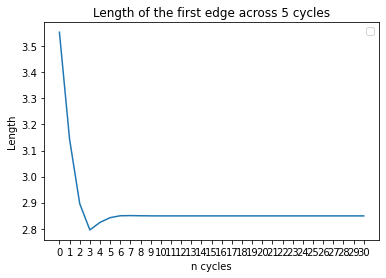

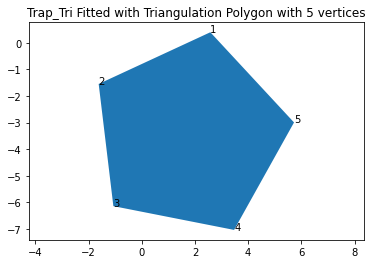

([<matplotlib.axis.XTick at 0x7fd1ca260f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

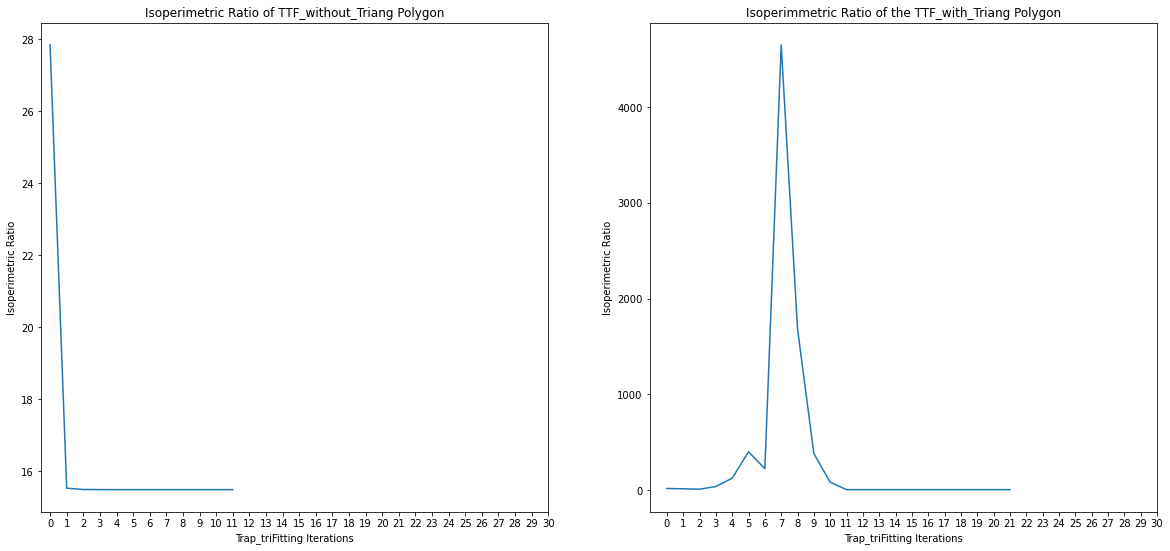

In [113]:

def isoperimetric_ratio(perim, area):
    return np.power(perim,2)/area;

# rotate through the vertices to split-> trapezoid/triangle fitting -> glue back together (currently just one cycle)
def trapTriFitting(vertices, iter):
    iter_converged = 0
    n = len(vertices)
    perim = perimeter(vertices)
    isoperimetric_ratios = [np.power(perim,2)/PolyArea(vertices)]
    # applying trap_tri fitting iter times
    for x in range(iter):
        for i in range(n):
            #print(f"-------------Fitting from {i}th vertex----------------")
            # Step 1: Partition Poly
            partitions, poly_indices = split_poly(vertices, i)
            
            # Step 2: Trapezoid/Triangle Fitting
            for j in range(len(partitions)):
                curr_par = partitions[j]
                #print("current_partition:",curr_par)
                #print("current_partition_perim:",perimeter(curr_par))

                #sketch_polygon(curr_par)

                if(len(curr_par)==3):
                    partitions[j] = make_isosceles(curr_par)
                else:
                    intertrap, trap = quadToTrapezoid(curr_par)
                    partitions[j] = trap
                # sketch partition
                #print("transformed_partition:",partitions[j])
                #print("transformed_partition_perim:",perimeter(partitions[j]))

                #sketch_polygon(partitions[j])

            # Step 3: Glue the transformed partitions
            transformed_poly = partitions[0]

            for k in range(len(partitions)):
                for h in range(len(partitions[k])):

                    curr_vertex = partitions[k][h]
                    is_in_list = np.any(np.all(curr_vertex == transformed_poly, axis=1))

                    if (is_in_list):
                        pass
                    else:
                        transformed_poly.append(curr_vertex)
            # Step 4: Sort the transformed vertices by angle (non-self intersecting polygon)
            transformed_vertices = sort_vertices(transformed_poly)
            #print(f"polygon after {i}th iteration")
            #sketch_polygon(transformed_vertices)

            # Set new poly
            vertices = transformed_vertices
            
        # store the area of the polygon after this iteration
        isoperimetric_ratios.append(np.power(perim,2)/PolyArea(vertices))

        # check for convergence
        tol = 10e-10

        if(np.abs(isoperimetric_ratios[-1]-isoperimetric_ratios[-2])<=tol):
            iter_converged = x+1
            return vertices, isoperimetric_ratios, iter_converged

    return vertices, isoperimetric_ratios, -1


# test
n = 5

# Build Poly with Triangulation
start_poly = generate_random_polygon(n)

triang_iter = 30
trap_tri_iter = 30

print("----------Starting Poly------------")

print("start_poly:",start_poly)
print("start_poly_perimeter:",perimeter(start_poly))
print("start_poly_area:",PolyArea(start_poly))
print("start_poly_iso:",isoperimetric_ratio(perimeter(start_poly),PolyArea(start_poly)))
sketch_polygon(start_poly)


print("----------Trap_Tri Fitting Without Triangulation------------")

ttFittedWithoutTriang, ttFittedWithoutTriang_ISO, ttFittedWithoutTriang_convergedIter = trapTriFitting(start_poly.copy(),trap_tri_iter)
print("ttFittedWithoutTriang:",ttFittedWithoutTriang)
print("ttFittedWithoutTriang_perimeter:",perimeter(ttFittedWithoutTriang))
print("ttFittedWithoutTriang_area:",PolyArea(ttFittedWithoutTriang))
print("ttFittedWithoutTriang_iso:",isoperimetric_ratio(perimeter(ttFittedWithoutTriang),PolyArea(ttFittedWithoutTriang)))
print("ttFittedWithoutTriang_convergedIter:",ttFittedWithoutTriang_convergedIter)
sketch_polygon(ttFittedWithoutTriang, "Trap_Tri Fitted")


print("----------Trap_tri Fitting Poly with Triangulation------------")

triang_poly = measure_convergence(start_poly.copy(),triang_iter)
ttFittedWithTriang, ttFittedWithTriang_ISO, ttFittedWithTriang_convergedIter = trapTriFitting(triang_poly,trap_tri_iter)
print("ttFittedWithTriang:",ttFittedWithTriang)
print("ttFittedWithTriang_perimeter:",perimeter(ttFittedWithTriang))
print("ttFittedWithTriang_area:",PolyArea(ttFittedWithTriang))
print("ttFittedWithTriang_iso:",isoperimetric_ratio(perimeter(ttFittedWithTriang), PolyArea(ttFittedWithTriang)))
print("ttFittedWithTriang_convergedIter:",ttFittedWithTriang_convergedIter)

sketch_polygon(ttFittedWithTriang, "Trap_Tri Fitted with Triangulation")


ratio_plot = plt.figure(figsize=[20,9])
# plotting area of polygon without triangulation headstart
plt.subplot(1,2,1)
plt.plot(ttFittedWithoutTriang_ISO)
plt.title(f"Isoperimetric Ratio of TTF_without_Triang Polygon")
plt.xlabel("Trap_triFitting Iterations")
plt.ylabel("Isoperimetric Ratio")
plt.xticks(np.arange(0,iter+1))

# plotting area of polygon with triangulation headstart
plt.subplot(1,2,2)
plt.plot(ttFittedWithTriang_ISO)
plt.title(f"Isoperimmetric Ratio of the TTF_with_Triang Polygon")
plt.xlabel("Trap_triFitting Iterations")
plt.ylabel("Isoperimetric Ratio")
plt.xticks(np.arange(0,iter+1))




Mean convergedIter_withoutTriang:  11.016

std convergedIter_withoutTriang:  1.6744384133195225

variance convergedIter_withoutTriang:  2.803744


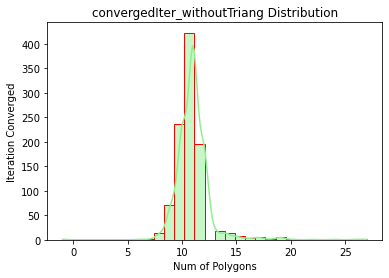


Mean convergedIter_withTriang:  10.255

std convergedIter_withTriang:  1.2930487229799195

variance convergedIter_withTriang:  1.6719750000000004


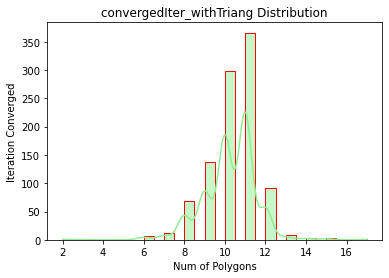

In [127]:
# probabilistic analysis
import seaborn as sns

# we run trapTriFitting(vertices,30) on 100 random polygons and return the normal distribution of with triang vs. without triang
n = 5
triang_iter = 30
trap_tri_iter = 30
numOfPolygons = 1000

convergedIter_withoutTriang = []
convergedIter_withTriang = []

# gather the converging iteration numbers
for i in range(numOfPolygons):
    polygon = generate_random_polygon(n)
    ttFittedWithoutTriang, ttFittedWithoutTriang_ISO, ttFittedWithoutTriang_convergedIter = trapTriFitting(polygon.copy(),trap_tri_iter)
    triang_poly = measure_convergence(polygon.copy(),triang_iter)
    ttFittedWithTriang, ttFittedWithTriang_ISO, ttFittedWithTriang_convergedIter = trapTriFitting(triang_poly,trap_tri_iter)

    convergedIter_withoutTriang.append(ttFittedWithoutTriang_convergedIter)
    convergedIter_withTriang.append(ttFittedWithTriang_convergedIter)

# plot the normal distribution of the convergent iterations
r1 = np.mean(convergedIter_withoutTriang) 
print("\nMean convergedIter_withoutTriang: ", r1) 
r2 = np.std(convergedIter_withoutTriang) 
print("\nstd convergedIter_withoutTriang: ", r2) 
r3 = np.var(convergedIter_withoutTriang) 
print("\nvariance convergedIter_withoutTriang: ", r3)
sns.histplot(convergedIter_withoutTriang, bins=30, kde=True, color='lightblue', edgecolor='red')
plt.title("convergedIter_withoutTriang Distribution")
plt.xlabel("Num of Polygons")
plt.ylabel("Iteration Converged")
plt.show()



e1 = np.mean(convergedIter_withTriang) 
print("\nMean convergedIter_withTriang: ", e1) 
e2 = np.std(convergedIter_withTriang) 
print("\nstd convergedIter_withTriang: ", e2) 
e3 = np.var(convergedIter_withTriang) 
print("\nvariance convergedIter_withTriang: ", e3)
sns.histplot(convergedIter_withTriang, bins=30, kde=True, color='lightblue', edgecolor='red')
plt.title("convergedIter_withTriang Distribution")
plt.xlabel("Num of Polygons")
plt.ylabel("Iteration Converged")
plt.show()